<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/Project_Housing_prices_in_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project: Housing prices in London

In [2]:
#project about prices for flats in London

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go

In [5]:
flats = pd.read_csv('/content/London.csv', index_col = 0)

In [6]:
flats.rename(columns = {'Property Name':'Property_Name','Price' : 'Price_in_Pounds',
                        'House Type':'House_Type', 'Area in sq ft' : 'Area_in_feets',
                        'No. of Bedrooms' : 'Number_of_Bedrooms', 'No. of Bathrooms' : 'Number_of_Bathrooms',
                        'No. of Receptions':'Number_of_Receptions', 'Postal Code':'Postal_Code',
                        'City/County' : 'City_County'}, inplace=True)


def house_type(df):
    type_int = []
    for x in df:
        if x == 'Mews':
            type_int.append(1)
        elif x == 'Duplex':
            type_int.append(2)
        elif x == 'Bungalow':
            type_int.append(3)
        elif x == 'Studio':
            type_int.append(4)
        elif x == 'Penthouse':
            type_int.append(5)
        elif x == 'New development':
            type_int.append(6)
        elif x == 'House':
            type_int.append(7)
        else:
            type_int.append(8)
    return type_int

flats['House_Type_Int'] = house_type(flats.House_Type)

In [7]:
flats.head()

,Property_Name,Price_in_Pounds,House_Type,Area_in_feets,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Receptions,Location,City_County,Postal_Code,House_Type_Int
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,7
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,8
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,8
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,7
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,8


In [8]:
flats.Number_of_Bedrooms.value_counts()

,count
Number_of_Bedrooms,
2,1078
3,706
4,576
5,453
1,414
6,176
7,53
0,10
8,10


In [9]:
#Mean, Meadian and Standatd Deviation¶


In [10]:
mean_Price = round(flats.Price_in_Pounds.mean(),2)
mean_Area = round(flats.Area_in_feets.mean(),2)
mean_Bedrooms = round(flats.Number_of_Bedrooms.mean(),2)

med_Price = round(flats.Price_in_Pounds.median(),2)
med_Area = round(flats.Area_in_feets.median(),2)
med_Bedrooms = round(flats.Number_of_Bedrooms.median(),2)

std_Price = round(flats.Price_in_Pounds.std(),2)
std_Area = round(flats.Area_in_feets.std(),2)
std_Bedrooms = round(flats.Number_of_Bedrooms.std(),2)

In [11]:
flats_descriptive = pd.DataFrame({'Type' : ['Price_in_Pounds',
                                            'Area_in_feets',
                                            'Number_of_Bedrooms']})

flats_descriptive['Mean'] = [mean_Price, mean_Area, mean_Bedrooms]
flats_descriptive['Median'] = [med_Price, med_Area, med_Bedrooms]
flats_descriptive['Standard_Deviation'] = [std_Price, std_Area, std_Bedrooms]

flats_descriptive

,Type,Mean,Median,Standard_Deviation
0,Price_in_Pounds,1864172.54,1220000.0,2267282.96
1,Area_in_feets,1712.97,1310.0,1364.26
2,Number_of_Bedrooms,3.10,3.0,1.52


In [12]:
#Plot 1

<ipython-input-13-0c7dd3aa2d9f>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['House_Type'] == 'House', "Price_in_Pounds"],
<ipython-input-13-0c7dd3aa2d9f>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['House_Type'] == 'Flat / Apartment', "Price_in_Pounds"],
<ipython-input-13-0c7dd3aa2d9f>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['House_Type'] == 'New development', "Price_in_Pounds"],
<ipython-input-13-0c7dd3aa2d9f>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

 

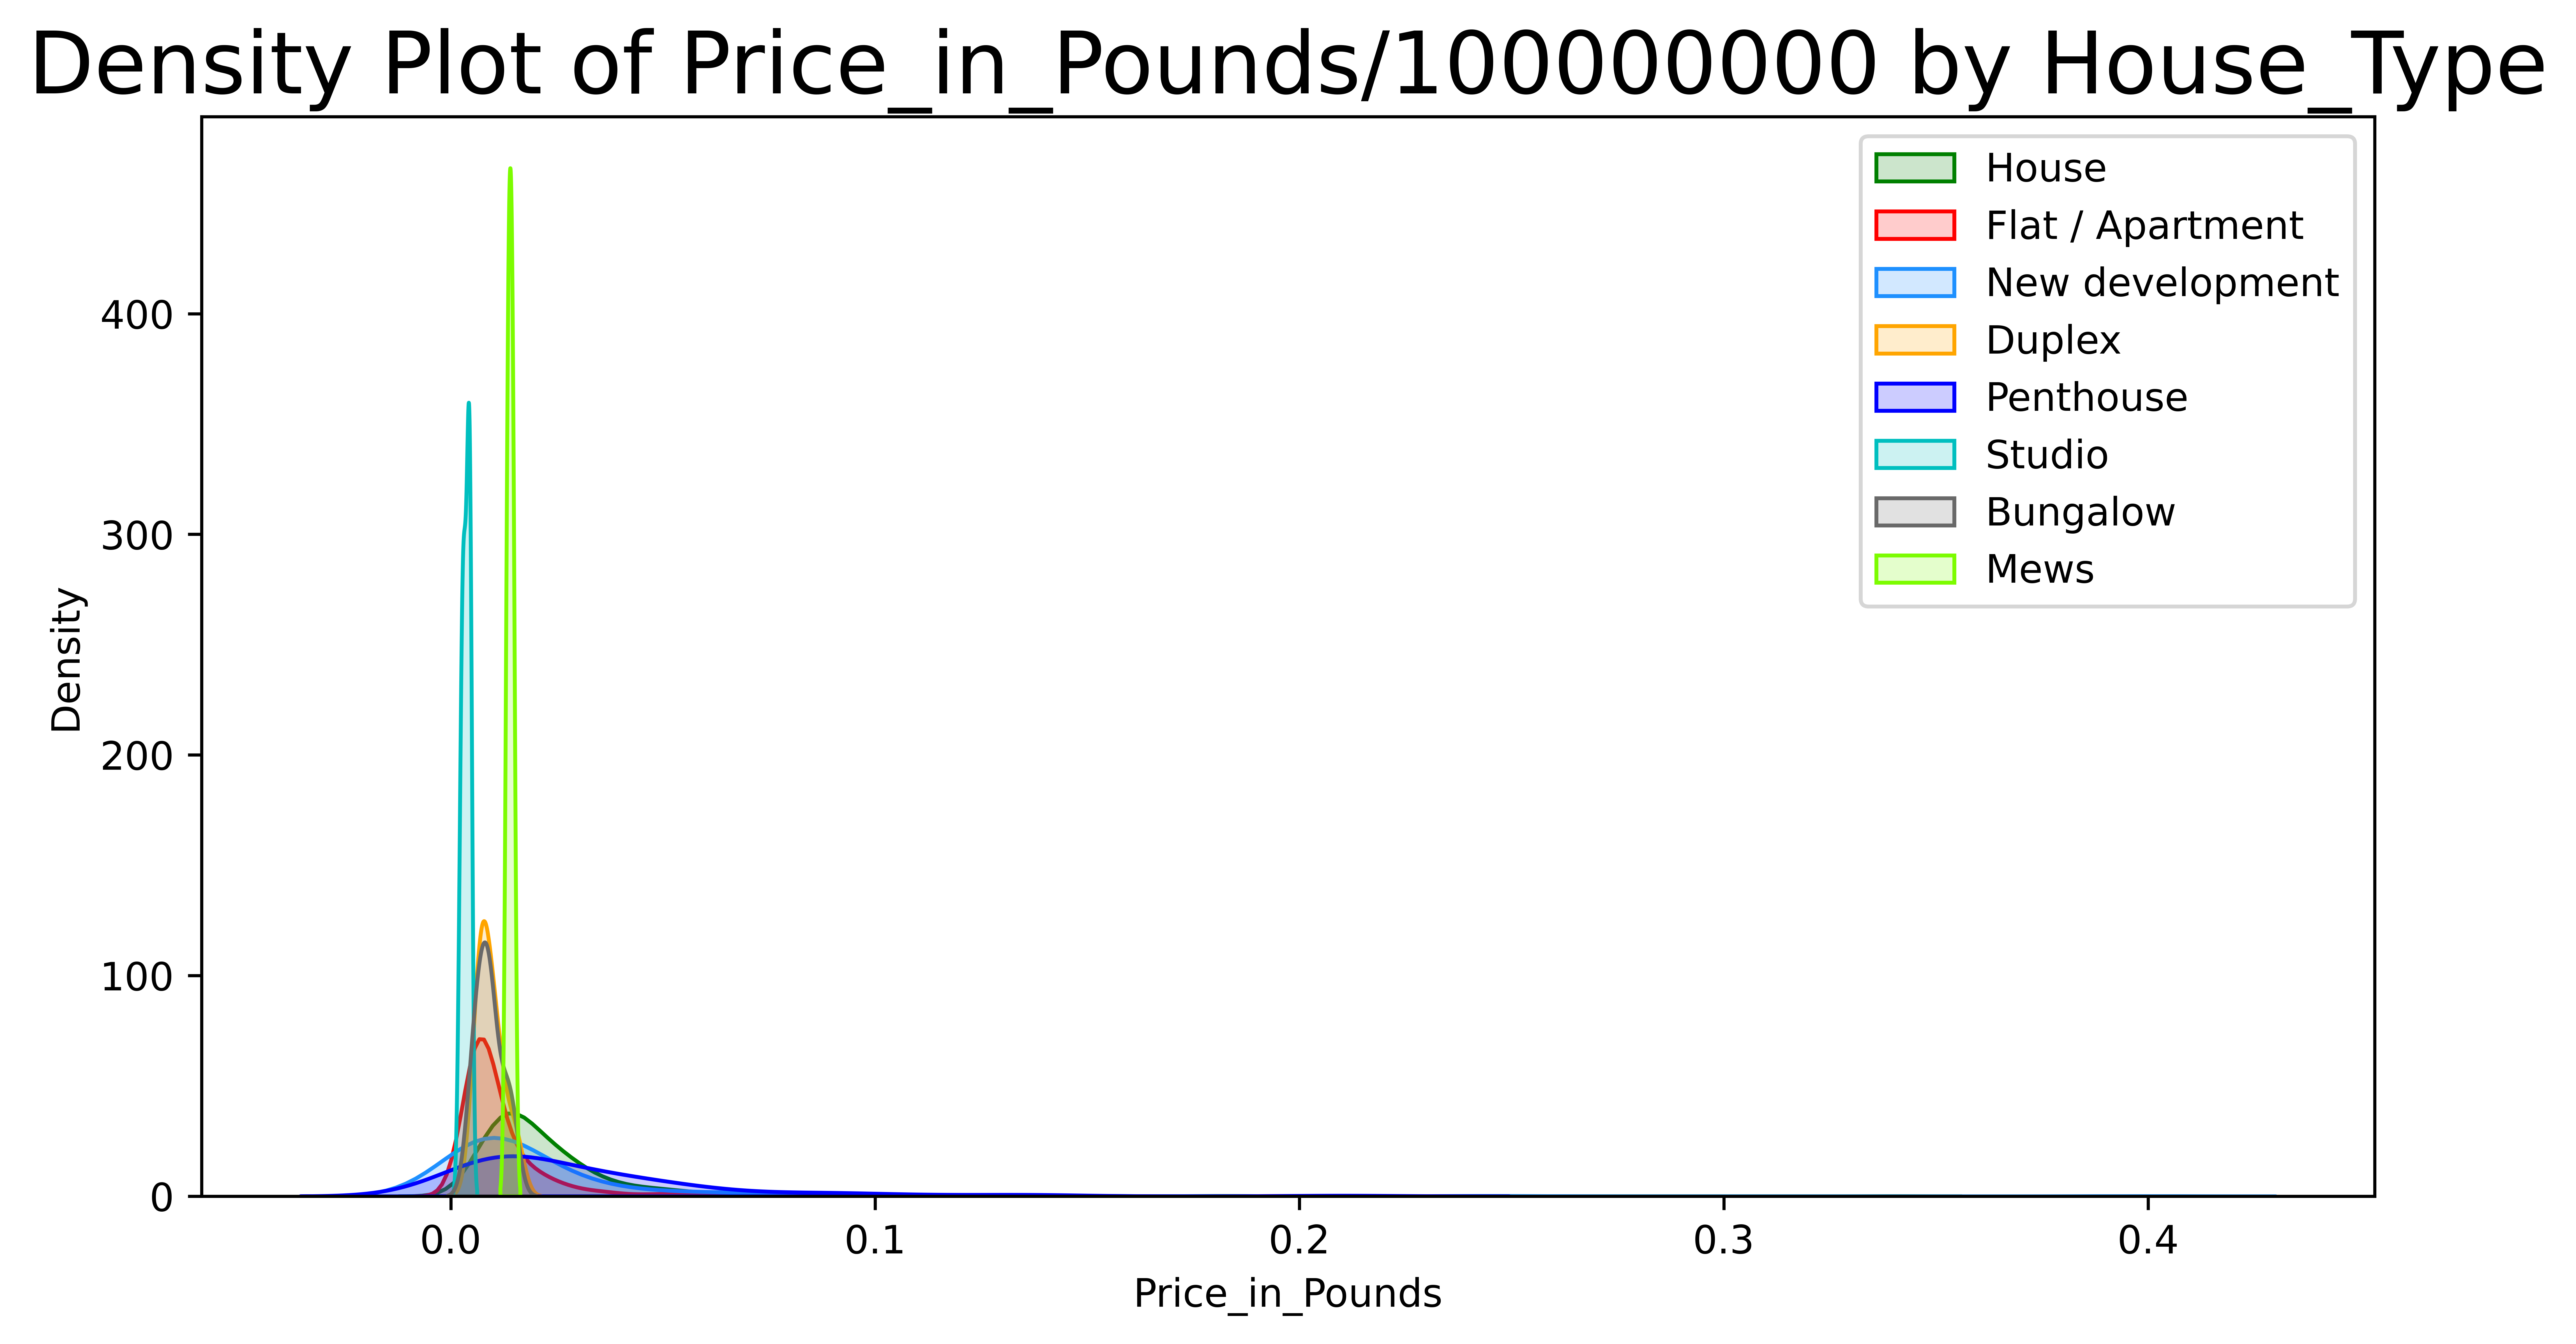

In [13]:
def price_1(df):
    prices = []
    length = len(df)
    for x in df:
        prices.append((x/100000000))
    return prices


flats_copy_2 = pd.DataFrame({'Price_in_Pounds' : price_1(flats.Price_in_Pounds)})
flats_copy_2['House_Type'] = flats.House_Type



# Import Data
df = flats_copy_2

# Draw Plot
plt.figure(figsize=(10,5
                   ), dpi= 1000)
sns.kdeplot(df.loc[df['House_Type'] == 'House', "Price_in_Pounds"],
            shade=True, color="green", label="House", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Flat / Apartment', "Price_in_Pounds"],
            shade=True, color="red", label="Flat / Apartment", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'New development', "Price_in_Pounds"],
            shade=True, color="dodgerblue", label="New development", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Duplex', "Price_in_Pounds"],
            shade=True, color="orange", label="Duplex", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Penthouse', "Price_in_Pounds"],
            shade=True, color="blue", label="Penthouse", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Studio', "Price_in_Pounds"],
            shade=True, color="c", label="Studio", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Bungalow', "Price_in_Pounds"],
            shade=True, color="dimgrey", label="Bungalow", alpha=.2)
sns.kdeplot(df.loc[df['House_Type'] == 'Mews', "Price_in_Pounds"],
            shade=True, color="lawngreen", label="Mews", alpha=.2)

# Decoration
plt.title('Density Plot of Price_in_Pounds/100000000 by House_Type', fontsize=22)
plt.legend()
plt.show()

In [14]:
#Plot 2

In [15]:
x_value = flats.Number_of_Bedrooms.value_counts()
x_index = x_value.index

fig = go.Figure(data=[go.Pie(labels = x_index, values= x_value,
                             title='Bedrooms in Flats', textinfo='label+percent',hole=.5)])
fig.show()

In [16]:
#Plot 3


In [17]:
def price(df):
    prices = []
    length = len(df)
    for x in df:
        prices.append((x/1000))
    return prices

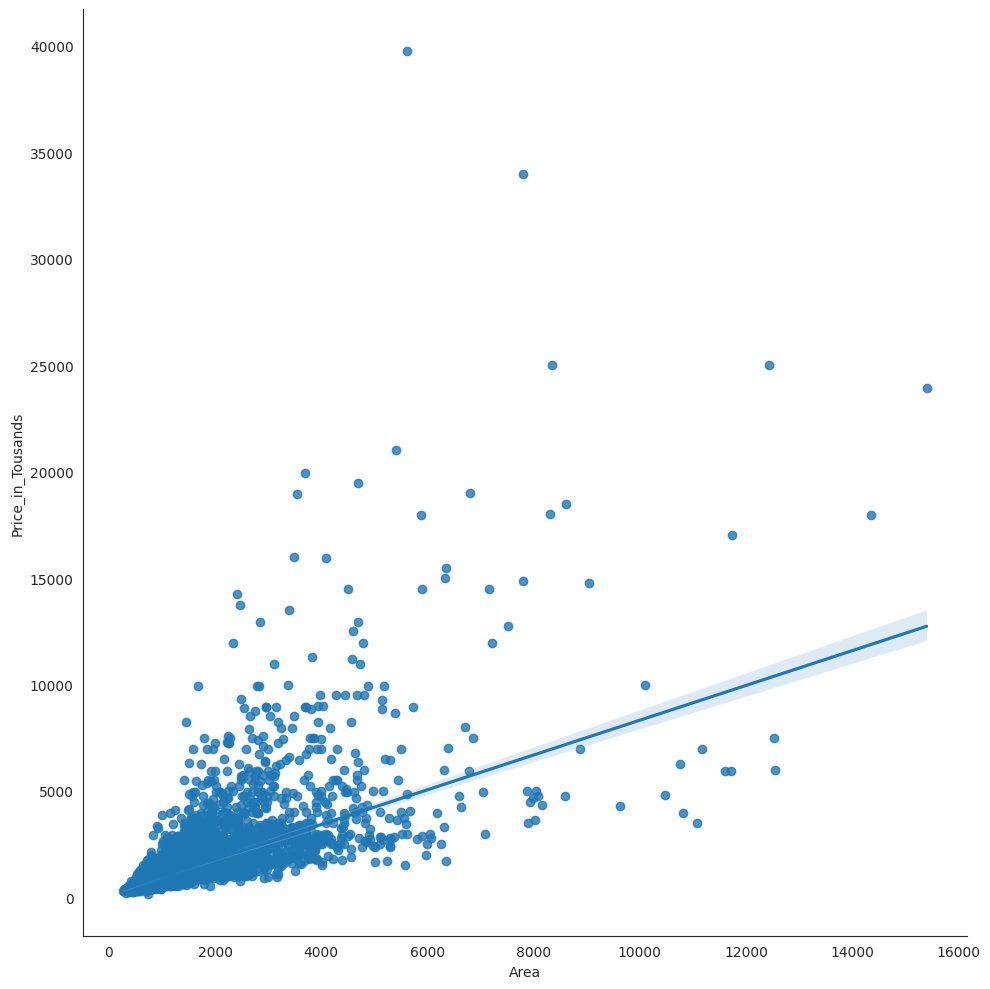

In [18]:
flats_copy = pd.DataFrame({'Price_in_Tousands' : price(flats.Price_in_Pounds)})
flats_copy['Area'] = flats.Area_in_feets
flats_copy['House_type'] = flats.House_Type_Int



sns.set_style("white")
sns.lmplot(x="Area", y="Price_in_Tousands",
                     data=flats_copy,
                     height=10,
                     robust=True,
                     palette='Set3')

plt.show()

London Housing - Using Postcodes and Fuzzymatching

In [23]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.3 MB/s eta 0:00:00


In [25]:
import numpy as np
import pandas as pd
from rapidfuzz import fuzz, process

In [26]:
full_data = pd.read_csv('/content/London.csv')
full_data.tail()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR
3479,3479,Courtenay Avenue,8650000,House,5395,6,6,6,Highgate,London,N6 4LP


Read postcode database


In [29]:
# Read postcode database
postcode_db = pd.read_csv('/content/codelist.csv')

# Read the codebook and convert into dictionary for fast lookup
codebook = pd.read_csv('/content/codelist.csv') \
    .set_index('code').to_dict()['human_readable_name']

# Replace each GSS code in postcode database with human-readable names
for col in postcode_db.columns[1:]:
    postcode_db[col] = postcode_db[col].apply(lambda x: codebook.get(x, x))

postcode_db.sample(10)

,code,human_readable_name
2645,E05011056,Vicarage Ward
7066,E05001733,Bottesford Ward
6086,E05013495,Wylye Valley ED
5078,E05001150,West Park Ward
445,E05004194,Heybridge East Ward
6985,E05001539,Ingleby Barwick West Ward
6380,W05000327,Llansantffraid ED
914,E05005502,Melton Dorian Ward
636,E05004796,Marshalswick South Ward
1461,E05007862,Teme Valley Ward


In [30]:
postcode_db.shape


(8624, 2)

London House Price Prediction

In [34]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import sklearn

In [35]:
# Import the dataset and check layout
df1 = pd.read_csv("/content/London.csv")
df1.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [36]:
# Checking for number of rows
df1.shape

(3480, 11)

In [37]:
# Checking for number of locations
len(df1.Location.unique())

657

In [38]:
# Cretaing a column for area code to better divide London locations
df1['Area'] = df1['Postal Code'].str.split(' ').str[0]

In [40]:
# Checking number of areas
area_count =df1.groupby('Area')['Area'].agg('count').sort_values(ascending=False)
area_count

,Area
Area,
SW11,231
SW18,175
N1,139
SW6,135
SW15,115
...,...
TW17,1
TW2,1
TW7,1


In [41]:
# Checking for areas with less than 10 properties
len(area_count[area_count <= 10])

83

In [42]:
# Create list of areas with less than 10 properties
area_less_than_10 = area_count[area_count <= 10]
area_less_than_10

,Area
Area,
W13,10
N4,10
WD19,10
IG7,9
CR5,9
...,...
TW17,1
TW2,1
TW7,1


In [43]:
# Turn Areas with less than 10 properties into other area
# df1.Location = df1.Location.apply(lambda x: 'other' if x in area_less_than_10 else x)

In [44]:
# Checking for null values
df1.isnull().sum()

,0
Unnamed: 0,0
Property Name,0
Price,0
House Type,0
Area in sq ft,0
No. of Bedrooms,0
No. of Bathrooms,0
No. of Receptions,0
Location,962
City/County,0


In [45]:
# Dropping null values
# df2 = df1.dropna()
# df2.isnull().sum()

df2 =df1.copy()

In [46]:
# Checking for any possible incorrectly input of data
df2['No. of Bedrooms'].unique()

array([ 5,  2,  4,  1,  3,  6, 10,  7,  0,  8,  9])

In [47]:
# Checking to see if properties with large numbers of bedrooms are valid
df2.loc[df2['No. of Bedrooms'] > 8]

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area
43,43,Old Battersea House,9975000,House,10100,10,10,10,Battersea,London,SW11 3LD,SW11
1422,1422,St. Petersburgh Place,5500000,House,4227,9,9,9,NaN,London,W2 4LA,W2
2619,2619,Courtenay Avenue,16999999,House,11733,9,9,9,Highgate,London,N6 4LR,N6
3394,3394,Upper Wimpole Street,14750000,House,9053,9,9,9,Marylebone,London,W1G 6LG,W1G


In [48]:
# Checking for the reason for properties to have zero bedrooms
df2.loc[df2['No. of Bedrooms'] == 0]

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area
154,154,Mare Street,260000,Studio,381,0,0,0,Hackney,London,E8 3RH,E8
350,350,Kersfield House,210000,Studio,328,0,0,0,Putney,London,SW15 3HJ,SW15
393,393,Cumberland Terrace Mews,295000,Studio,344,0,0,0,Regent's Park,London,NW1 4HR,NW1
436,436,Cautley Avenue,295000,Studio,277,0,0,0,NaN,London,SW4 9HU,SW4
770,770,Montpellier Road,350000,Studio,425,0,0,0,Ealing,London,W5 2QS,W5
951,951,Vicarage Court,450000,Studio,410,0,0,0,Vicarage Gate,London,W8 4HF,W8
1313,1313,The Madison,573000,New development,429,0,0,0,199 To 207 Marsh Wall,London,E14 9YT,E14
1345,1345,Vandon Court,450000,Studio,332,0,0,0,Westminster,London,SW1H 9HE,SW1H
1444,1444,Eardley Crescent,385000,Studio,297,0,0,0,NaN,London,SW5 9JT,SW5
1447,1447,Wapping Lane,450000,Studio,680,0,0,0,NaN,London,E1W 2RX,E1W


In [49]:
# Testing to see any incorrectly input area values
df2['Area in sq ft'].unique()

array([2716,  814,  761, ..., 4435, 1506, 5395])

In [50]:
# Creating a function to identify if values are a float (correct format)
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [51]:
#  Applying function to create a table of all values which are not float values
df2[~df2['Area in sq ft'].apply(is_float)]

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area


In [52]:
# Create new dataframe to create a price per squarefoot
df3 = df2.copy()
df3['Price per sqft'] =df3['Price']/df3['Area in sq ft']

In [53]:
df3.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area,Price per sqft
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,SW19,616.715758
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,EC1V,798.525799
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,SW15,965.834428
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,SW15,888.721047
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,SW15,964.285714


In [54]:
# Checking for propeties below threshold of 300 sq ft per bedroom
df3[df3['Area in sq ft']/df3['No. of Bedrooms']<300].head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area,Price per sqft
30,30,Wetherby House,1100000,Flat / Apartment,582,2,2,2,20-21 Wetherby Gardens,London,SW5 0JP,SW5,1890.034364
41,41,Coles Court,650000,Flat / Apartment,869,3,3,3,NaN,Battersea,SW11 3DU,SW11,747.986191
49,49,Park Close,725000,House,884,3,3,3,South Hackney,London,E9 7LF,E9,820.135747
60,60,Chasefield Road,875000,House,1132,4,4,4,Tooting,London,SW17 8LW,SW17,772.968198
96,96,Sisters Avenue,500000,Flat / Apartment,516,2,2,2,NaN,London,SW11 5SQ,SW11,968.992248


In [55]:
# Remove outliers below threshold
df4 = df3[~(df3['Area in sq ft']/df3['No. of Bedrooms']<300)]
df4.shape

(3388, 13)

In [56]:
# Check for outliers in Price per sq ft
df4['Price per sqft'].describe()

,Price per sqft
count,3388.000000
mean,1070.434427
std,582.993595
min,241.610738
25%,728.692530
50%,906.897463
75%,1213.503186
max,7069.180153


In [57]:
# Create function to remove price per sq ft outliers of two standard deviations (outside 95%)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Area'):
        m = np.mean(subdf['Price per sqft'])
        st = np.std(subdf['Price per sqft'])
        reduced_df = subdf[(subdf['Price per sqft']>(m-2*st)) & (subdf['Price per sqft']<=(m+2*st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [58]:
# Apply function to dataframe
df5 = remove_pps_outliers(df4)
df5.shape

(3190, 13)

In [59]:
def plot_scatter(df,location):
    bedrooms2 = df[(df['Area']==location) & (df['No. of Bedrooms']==2)]
    bedrooms3 = df[(df['Area']==location) & (df['No. of Bedrooms']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedrooms2['Area in sq ft'], bedrooms2['Price'], color ='blue', label = ' 2 Bedrooms', s=50)
    plt.scatter(bedrooms3['Area in sq ft'], bedrooms3['Price'], color ='red', label = ' 3 Bedrooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()


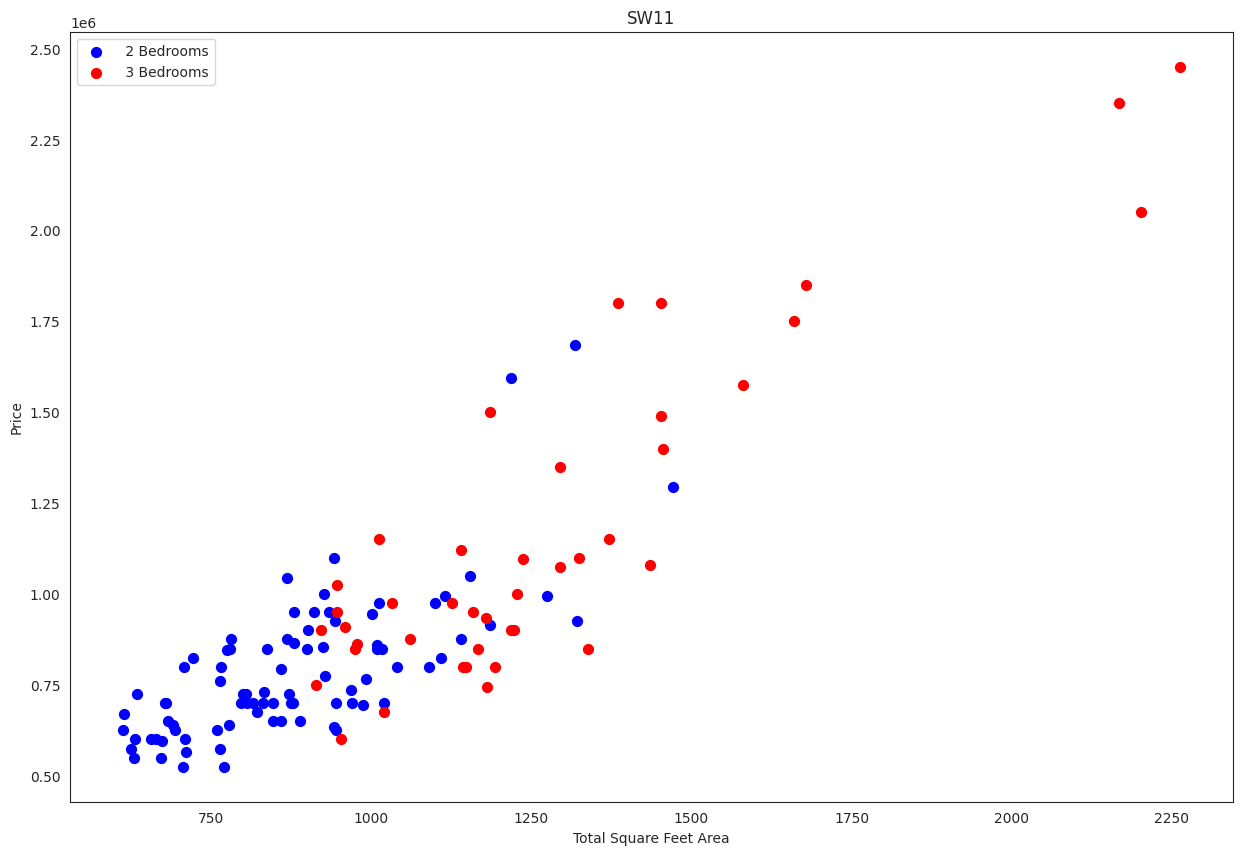

In [60]:
plot_scatter(df5, 'SW11')

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Area'):
        bedrooms_stats = {}
        for bedrooms, bedrooms_df in location_df.groupby('No. of Bedrooms'):
            bedrooms_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df['Price per sqft']),
                'std': np.std(bedrooms_df['Price per sqft'])*2,
                'count': bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby('No. of Bedrooms'):
            stats = bedrooms_stats.get(bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df['Price per sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)

df6.shape

(2171, 13)

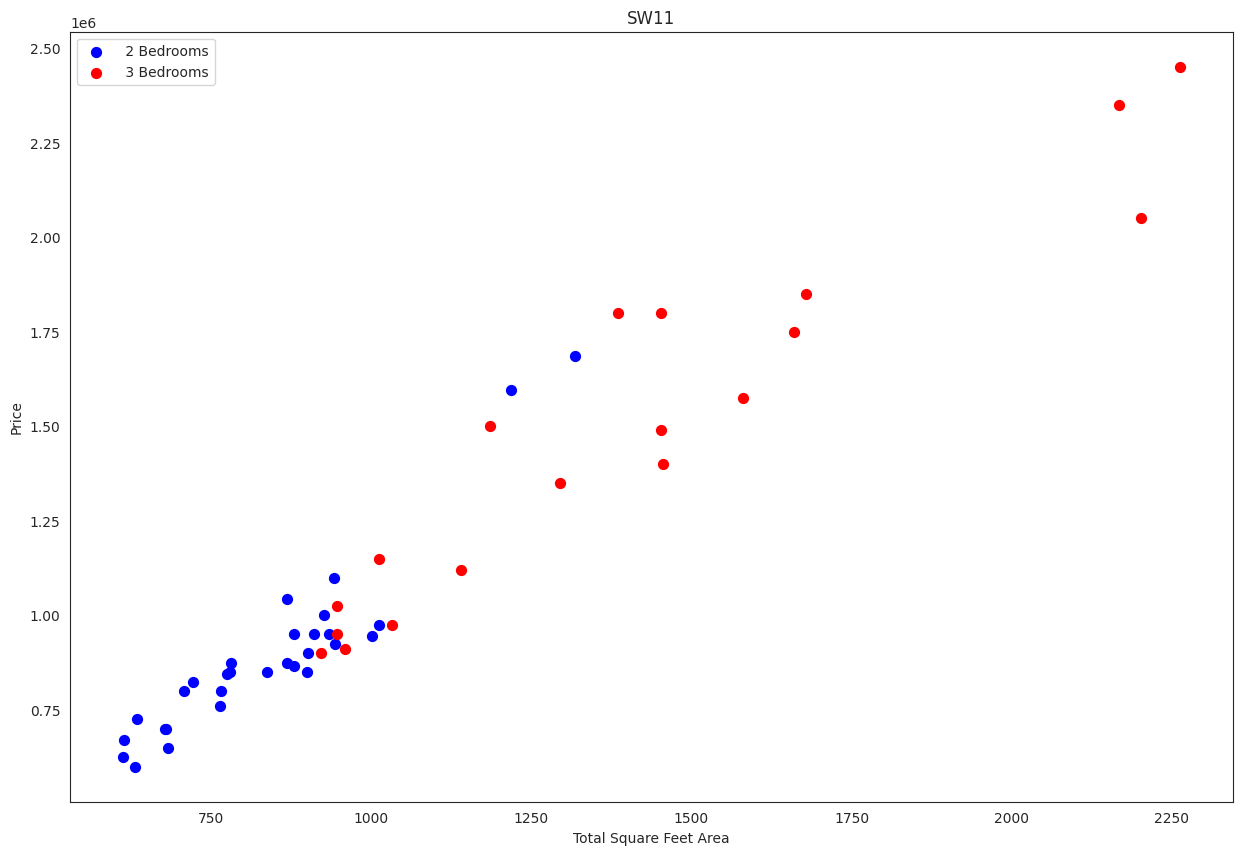

In [62]:
plot_scatter(df6, 'SW11')

Text(0, 0.5, 'Count')

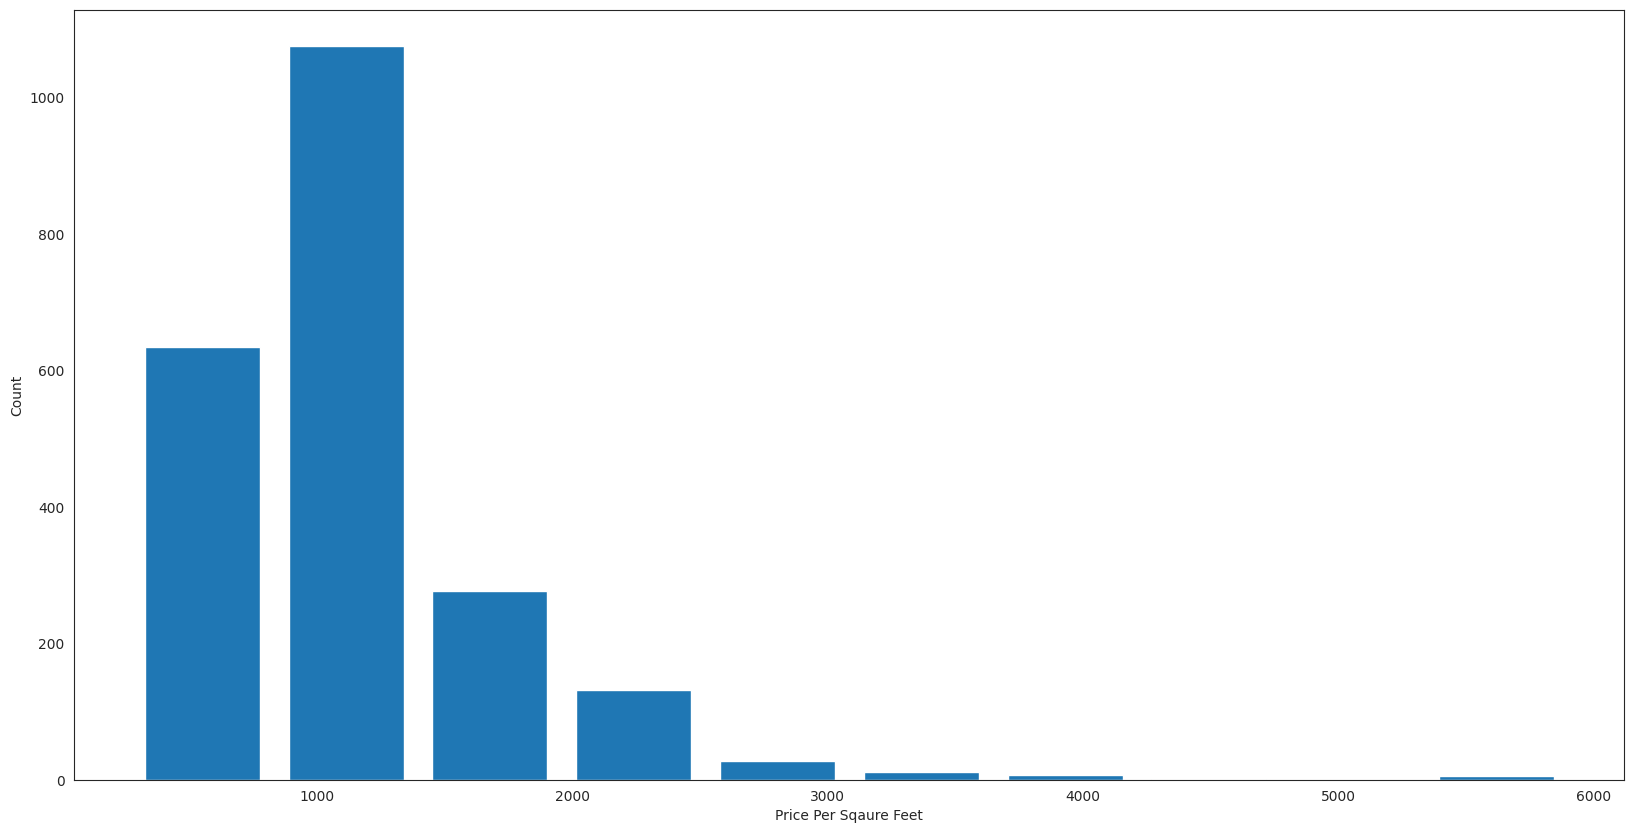

In [63]:
# Checking to see where the majority of properties lay in terms of Size (Square Feet)
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6["Price per sqft"], rwidth =0.8)
plt.xlabel("Price Per Sqaure Feet")
plt.ylabel("Count")

In [64]:
# Checking for outliers in the amount of bathrooms in a property
df6["No. of Bathrooms"].unique()

array([ 4,  5,  3,  6,  7,  1,  2,  0,  8, 10,  9])

In [65]:
# Checking for properties outsdie the rule of a property not having the same numbers of bathrooms as bedrooms +2
df6[df6["No. of Bathrooms"]> df6["No. of Bedrooms"]+2]

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Area,Price per sqft


In [66]:
# Selct only required columns for model
df7 = df6.loc[:, ['Price','Area in sq ft','No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area']]

In [67]:
# Encoding the categoric variable Area to be used for regression
dummies = pd.get_dummies(df7.Area)

In [68]:
# Joining the encoded 'Area' column to the original dataframe
df8 = pd.concat([df7,dummies],axis = 'columns')
df8.head()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Area,CM16,CR5,E1,E14,...,W8,W9,WC1E,WC1N,WC1X,WC2B,WC2N,WC2R,WD19,WD23
0,799999,1507,4,4,4,CM16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1350000,2312,4,4,4,CM16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1265000,2568,5,5,5,CM16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,535000,900,3,3,3,CM16,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1250000,3503,6,6,6,CR5,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
# Removing original 'Area' column
df9 = df8.drop('Area', axis ='columns')
df9.head()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,CM16,CR5,E1,E14,E16,...,W8,W9,WC1E,WC1N,WC1X,WC2B,WC2N,WC2R,WD19,WD23
0,799999,1507,4,4,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1350000,2312,4,4,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1265000,2568,5,5,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,535000,900,3,3,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1250000,3503,6,6,6,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# Creating X data without price as that is what is being predicted
X = df9.drop('Price', axis='columns')
X.head()

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,CM16,CR5,E1,E14,E16,E1W,...,W8,W9,WC1E,WC1N,WC1X,WC2B,WC2N,WC2R,WD19,WD23
0,1507,4,4,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2312,4,4,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2568,5,5,5,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,900,3,3,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3503,6,6,6,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
 # Creating y data made up of the property prices needed to be predicted
y = df9.Price
y.head()

,Price
0,799999
1,1350000
2,1265000
3,535000
4,1250000


In [72]:
# Creating a testing and training datatset for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
# Testing the models accuracy
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7140085199998407

In [74]:
# Carrying out cross validation to measure the accuracy of the model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

# Negative values can be ignored and positive values lie between 69.5% and 80.9% acccuracy

array([ 7.44580300e-01, -2.31961788e+10, -3.71231874e+06,  6.94754096e-01,
        8.09287105e-01])

In [75]:
# Finding the best model between lasso regression and decsiion tree using GridSearchCV to perform hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

# From the results the lasso regression model is the most accurate model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e+14, tolerance: 8.543e+11

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.191e+14, tolerance: 8.194e+11

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.438e+14, tolerance: 8.947e+11

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

,model,best_score,best_params
0,lasso,0.748130,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.676914,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [76]:
# Creating the lasso regression model with the optimum parameters
lrm = Lasso(alpha=1.0, selection = 'random', tol=1e-1)
lrm.fit(X, y)

Lasso(selection='random', tol=0.1)

In [77]:
# Creating function to create a price predicition
def predict_price(Area,sqft,bed,bath,rec):
    loc_index = np.where(X.columns==Area)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bed
    x[2] = bath
    x[3] = rec
    if loc_index >= 0:
        x[loc_index] = 1

    return lrm.predict([x])[0]

In [78]:
# Testing the price predictor
f"£{round(predict_price('SW11',1000,2,2,2),2):,}"

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



'£975,414.73'